# Notebook for CP 220 Compendium Assignment #1

In [86]:
import pandas as pd, numpy as np, requests, re
from matplotlib import pyplot as plt
pd.set_option("max_columns", 100)
pd.set_option("max_rows", 100)

In [ ]:
cbp = pd.read_csv('data/cbp16co.txt')
cbp13 = pd.read_csv('cbp13co.txt')

In [2]:
# nine-county Bay Area region
nine_counties = [1, 13, 41, 55, 75, 81, 85, 95, 97]

In [146]:
industries = {
    "11----" : "Agriculture, Forestry, Fishing and Hunting",
    "21----" : "Mining, Quarrying, and Oil and Gas Extraction",
    "22----" : "Utilities",
    "23----" : "Construction",
    "31----" : "Manufacturing",
    "42----" : "Wholesale Trade",
    "44----" : "Retail Trade",
    "48----" : "Transportation and Warehousing",
    "51----" : "Information",
    "52----" : "Finance and Insurance",
    "53----" : "Real Estate and Rental and Leasing",
    "54----" : "Professional, Scientific, and Technical Services",
    "55----" : "Management of Companies and Enterprises",
    "56----" : "Administrative and Support and Waste Management and Remediation Services",
    "61----" : "Education Services",
    "62----" : "Health Care and Social Assistance",
    "71----" : "Arts, Entertainment, and Recreation",
    "72----" : "Accomodation and Food Services",
    "81----" : "Other Services (except Public Administration)",
    "92----" : "Public Administration",
    "99----" : "Unclassified"
}

In [ ]:
# dataframe for just the nine-county Bay Area region
df = cbp[(cbp["fipstate"] == 6) & (cbp['fipscty'].isin(nine_counties))].reset_index()

In [ ]:
# dropped all rows except two-digit NAICS codes

# for nine-county Bay Area
two_digit_naics = df[(df.naics.str[2:] == "----") & (df.naics.str[:2] != "--")].sort_values(["fipscty", "naics"]).reset_index()
two_digit_naics.head()

# for US as a whole
national_two_digit_naics = cbp[(cbp.naics.str[2:] == "----") & (cbp.naics.str[:2] != "--")]

In [ ]:
# create an array of all the two-digit NAICS codes
two_digit_naics_codes = cbp[(cbp.naics.str[2:] == "----") & (cbp.naics.str[:2] != "--")]['naics'].unique()

## LOCATION QUOTIENT
<ul>
    <li>calculate location quotients to describe regional specialization</li>
    <li>currently handles two geographies; will be updated to take more</li>
    </ul>

In [ ]:
# 2016 data

result_list = []
regional_employment_by_industry_list = []
national_employment_by_industry_list = []

# get total number of employees by geography
regional_employees = sum(two_digit_naics['emp'])
national_employees = sum(national_two_digit_naics['emp'])

# iterate through two-digit industries
for naics in two_digit_naics_codes:
    
    # calculate number of employees by industry by geography
    regional_industy_employees = sum(two_digit_naics[two_digit_naics['naics'] == naics]['emp'])
    national_industry_employees = sum(national_two_digit_naics[national_two_digit_naics['naics'] == naics]['emp'])
    
    # calculate & save location quotient
    lq = (regional_industy_employees/regional_employees)/(national_industry_employees/national_employees)
    result_list.append(pd.DataFrame(data=[[industries[naics], round(lq, 2)]], columns=['Industry', 'Location Quotient']))

    
    # save number of regional employees by industry for use in other analyses
    regional_employment_by_industry_list.append(pd.DataFrame(data=[[industries[naics], regional_industy_employees]], columns=['Industry', 'Employees']))
    national_employment_by_industry_list.append(pd.DataFrame(data=[[industries[naics], national_industry_employees]], columns=['Industry', 'Employees']))
    
# create dataframe of industries and location quotients
# export dataframe as CSV
lq2016 = pd.concat(result_list, ignore_index=True)
lq2016.to_csv("output/LQ_2016_BAvsUSA.csv")

In [ ]:
# 2013 data

result_list13 = []
regional_employment_by_industry_list13 = []
national_employment_by_industry_list13 = []

# get total number of employees by geography
regional_employees13 = sum(two_digit_naics13['emp'])
national_employees13 = sum(national_two_digit_naics13['emp'])

# iterate through two-digit industries
for naics in two_digit_naics_codes:
    
    # calculate number of employees by industry by geography
    regional_industy_employees13 = sum(two_digit_naics13[two_digit_naics13['naics'] == naics]['emp'])
    national_industry_employees13 = sum(national_two_digit_naics13[national_two_digit_naics13['naics'] == naics]['emp'])
    
    # calculate & save location quotient
    lq = (regional_industy_employees13/regional_employees13)/(national_industry_employees13/national_employees13)
    result_list13.append(pd.DataFrame(data=[[industries[naics], round(lq, 2)]], columns=['Industry', 'Location Quotient']))

    
    # save number of regional employees by industry for use in other analyses
    regional_employment_by_industry_list13.append(pd.DataFrame(data=[[industries[naics], regional_industy_employees13]], columns=['Industry', 'Employees']))
    national_employment_by_industry_list13.append(pd.DataFrame(data=[[industries[naics], national_industry_employees13]], columns=['Industry', 'Employees']))
    
# create dataframe of industries and location quotients
# export dataframe as CSV
lq2013 = pd.concat(result_list13, ignore_index=True)
lq2013.to_csv("output/LQ_2013_BAvsUSA.csv")

In [ ]:
location_quotients = lq2013.merge(lq2016, on="Industry", suffixes=[" 2013"," 2016"])
location_quotients['Change'] = location_quotients['Location Quotient 2016'] - location_quotients['Location Quotient 2013']

location_quotients.to_csv("output/LocationQuotients_BayArea_vs_USA_2013_2016.csv")

location_quotients

In [ ]:
# visualize location quotients!

plt.clf()

location_quotients.iloc[:][["Location Quotient 2013", "Location Quotient 2016"]].plot(kind="bar", figsize=(10,10))

plt.xticks(np.arange(20), location_quotients['Industry'])
plt.plot(np.arange(20), np.ones(20), 'c:', linewidth=4)

plt.title("Location Quotients for the Bay Area, 2013-2016")
plt.ylabel("Location Quotient")

plt.savefig("img/LQ_compare.png")

plt.show()

<p style="color:red;font-size:16px;"><b>~*~Running again for other years. Attempted thru API, but TBD.~*~</b></p>

In [ ]:
year = 2013
variables = ["EMP"] 
geo = "county:*&in=state:06"
naics_year = 2012
naics_industry_code = 312

api_query = "https://api.census.gov/data/%s/cbp?get=%s&for=%s&NAICS%s=%s" % (year, ','.join(variables), geo, str(naics_year), str(naics_industry_code))
print(api_query)

In [ ]:
dfs = []

for code in industries.keys():
    shortcode = code[:2]
    api_query = "https://api.census.gov/data/%s/cbp?get=%s&for=%s&NAICS%s=%s" % (year, ','.join(variables), geo, str(naics_year), shortcode)
    
    r = requests.get(api_query)

    print(code, industries[code], r)

    values = []

    split_response = r.text[1:-1].split('\n')
    num_lines = len(split_response)

    for i in range(num_lines):
        s = split_response[i][1:-1]
        t = re.findall(r'(?:[^\s,"]|"(?:\\.|[^"])*")+', s)
        t = [x[1:-1] if x[-1] == '"' else x[1:-2] for x in t]
        values.append(t)
    header = values[0]
    values = values[1:]

    dfs.append(pd.DataFrame(data=values, columns=header))

cbp_data = pd.concat(dfs, ignore_index=True)


## DIVERSITY INDEX
<ul>
    <li> generate one statistic describing the industrial diversity of a geography </li>
    </ul>

In [ ]:
# rei is regional employment by industry
rei = pd.concat(regional_employment_by_industry_list, ignore_index=True)

In [ ]:
rei['Share'] = [x/regional_employees for x in list(rei['Employees'])]

In [ ]:
rei['Log_Share'] = [np.log(x) for x in list(rei['Share'])]
rei

In [ ]:
num_industries = len(rei)
diversity_index = -(sum(rei['Share'] * rei['Log_Share'])/np.log(num_industries))
round(diversity_index, 2)

Run the same steps at the national level.

In [ ]:
nei = pd.concat(national_employment_by_industry_list, ignore_index=True)
nei['Share'] = [x/national_employees for x in list(nei['Employees'])]
nei['Log_Share'] = [np.log(x) for x in list(nei['Share'])]
nei

In [ ]:
# national 2016 diversity index

num_industries = len(nei)
diversity_index = -(sum(nei['Share'] * nei['Log_Share'])/np.log(num_industries))
round(diversity_index, 2)

Now run the region again for 2013.

In [ ]:
rei13 = pd.concat(regional_employment_by_industry_list13, ignore_index=True)
rei13['Share'] = [x/regional_employees13 for x in list(rei13['Employees'])]
rei13['Log_Share'] = [np.log(x) for x in list(rei13['Share'])]
rei13

In [ ]:
num_industries = len(rei13)
diversity_index = -(sum(rei13['Share'] * rei13['Log_Share'])/np.log(num_industries))
round(diversity_index, 2)

And again for the nation in 2013.

In [ ]:
nei13 = pd.concat(national_employment_by_industry_list13, ignore_index=True)
nei13['Share'] = [x/national_employees for x in list(nei13['Employees'])]
nei13['Log_Share'] = [np.log(x) for x in list(nei13['Share'])]
nei13

In [ ]:
# national 2013 diversity index

num_industries = len(nei13)
diversity_index = -(sum(nei13['Share'] * nei13['Log_Share'])/np.log(num_industries))
round(diversity_index, 2)

In [ ]:
# save to a DF
diversity_index_results = pd.DataFrame(data=[["Bay Area", 0.88, 0.88], ["United States", 0.82, 0.87]], columns=["Geography", "Diversity Index 2013", "Diversity Index 2016"])

diversity_index_results.to_csv("output/DiversityIndex_BayArea_vs_US_2013-2013.csv")

diversity_index_results

## SHIFT-SHARE ANALYSIS

In [ ]:
# load CBP data from 2013

# dataframe for just the nine-county Bay Area region
df13 = cbp13[(cbp13["fipstate"] == 6) & (cbp13['fipscty'].isin(nine_counties))].reset_index()

# dropped all rows except two-digit NAICS codes

# for nine-county Bay Area
two_digit_naics13 = df13[(df13.naics.str[2:] == "----") & (df13.naics.str[:2] != "--")].sort_values(["fipscty", "naics"]).reset_index()
two_digit_naics13.head()

# for US as a whole
national_two_digit_naics13 = cbp13[(cbp13.naics.str[2:] == "----") & (cbp13.naics.str[:2] != "--")].reset_index()


# create an array of all the two-digit NAICS codes
two_digit_naics_codes13 = cbp13[(cbp13.naics.str[2:] == "----") & (cbp13.naics.str[:2] != "--")]['naics'].unique()



In [ ]:
# identify columns to keep for pending shift-share analysis

cols2use = ["fipscty", "naics", "emp"]

# merge 2013 and 2016 data for both the Bay Area and the U.S.

bay_area_emp = two_digit_naics13[cols2use].merge(two_digit_naics[cols2use], left_on=['fipscty','naics'], right_on=['fipscty', 'naics'], suffixes=["_13", "_16"])
usa_emp = national_two_digit_naics13[cols2use].merge(national_two_digit_naics[cols2use], left_on=['fipscty','naics'], right_on=['fipscty', 'naics'], suffixes=["_13", "_16"])



In [ ]:
# clean and aggregate employment data

df2be = []

for industry_code in list(bay_area_emp['naics'].unique()):
    df2be.append([industry_code, sum(bay_area_emp[bay_area_emp['naics'] == industry_code]['emp_13']), sum(bay_area_emp[bay_area_emp['naics'] == industry_code]['emp_16'])])

bay_area_emp_clean = pd.DataFrame(data=df2be, columns=['naics', 'emp13', 'emp16'])

df2be = []

for industry_code in list(usa_emp['naics'].unique()):
    df2be.append([industry_code, sum(usa_emp[usa_emp['naics'] == industry_code]['emp_13']), sum(usa_emp[usa_emp['naics'] == industry_code]['emp_16'])])

usa_emp_clean = pd.DataFrame(data=df2be, columns=['naics', 'emp13', 'emp16'])

bay_area_usa_emp = bay_area_emp_clean.merge(usa_emp_clean, left_on="naics", right_on="naics", suffixes=["_bay", "_usa"])

bay_area_usa_emp['industry'] = [industries[x] for x in bay_area_usa_emp['naics']]

bay_area_usa_emp = bay_area_usa_emp[['industry', 'naics','emp13_bay', 'emp16_bay','emp13_usa', 'emp16_usa']]
bay_area_usa_emp.to_csv("output/BayArea_USA_employment_2013_2016.csv")


In [ ]:
# new dataframe for shift-share analysis (ss)
ss = bay_area_usa_emp

# SHIFT-SHARE ANALYSIS

# national growth share
ss["natl_growth_rate"] = (sum(ss['emp16_usa']) - sum(ss['emp13_usa'])) / sum(ss['emp13_usa'])
ss["natl_growth_share"] = ss['emp13_bay'] * ss['natl_growth_rate']

# industry mix
ss["natl_industry_growth_rate"] = (ss['emp16_usa'] - ss['emp13_usa']) / ss['emp13_usa']
ss['industry_mix'] = ss['emp13_bay'] * (ss['natl_industry_growth_rate'] - ss['natl_growth_rate'])

# local competitiveness
ss['local_industry_growth_rate'] = (ss['emp16_bay'] - ss['emp13_bay']) / ss['emp13_bay']
ss['local_competitiveness'] = ss['emp13_bay'] * (ss['local_industry_growth_rate'] - ss['natl_industry_growth_rate'])

# change in local jobs
ss['local_emp_delta'] = ss['emp16_bay'] - ss['emp13_bay']

ss.to_csv("output/Shift-Share_BayArea2USA_2013-2016.csv")

ss.head()


In [ ]:
ss_results = ss[['industry','emp13_bay', 'emp16_bay','local_emp_delta', 'natl_growth_share', 'industry_mix', 'local_competitiveness']]

ss_results['explained_local_emp_delta'] = ss_results['natl_growth_share'] + ss_results['industry_mix'] + ss_results['local_competitiveness']
ss_results['unexplained_local_emp_delta'] = round(ss_results['local_emp_delta'] - ss_results['explained_local_emp_delta'],2)

ss_results


In [ ]:
# quick pass as visualizing with a bar chart

plt.clf()

ss_results.iloc[:][["natl_growth_share", "industry_mix", "local_competitiveness"]].plot(kind="bar", figsize=(10,10))

plt.xticks(np.arange(len(ss_results)),list(ss_results['industry']), rotation=90)

# plt.savefig('test.png')

## API experimentation

lookup data dictionaries for information stored in codes

In [ ]:
# EMPSZES attribute --> employment size of establishment
# https://api.census.gov/data/2016/cbp/variables/EMPSZES.json

empszes_lookup_api = requests.get("https://api.census.gov/data/2016/cbp/variables/EMPSZES.json")
empszes = empszes_lookup_api.json()['values']['item']

del empszes_lookup_api

Main data query

In [ ]:
year = 2016
variables = ["ESTAB", "EMPSZES"] 
geo = "county:*&in=state:06"
naics_year = 2012
naics_industry_code = 312

api_query = "https://api.census.gov/data/%s/cbp?get=%s&for=%s&NAICS%s=%s" % (year, ','.join(variables), geo, str(naics_year), str(naics_industry_code))





In [ ]:
r = requests.get(api_query)

print(r)

values = []

split_response = r.text[1:-1].split('\n')
num_lines = len(split_response)

for i in range(num_lines):
    s = split_response[i][1:-1]
    t = re.findall(r'(?:[^\s,"]|"(?:\\.|[^"])*")+', s)
    t = [x[1:-1] if x[-1] == '"' else x[1:-2] for x in t]
    values.append(t)
header = values[0]
values = values[1:]

testDF = pd.DataFrame(data=values, columns=header)
print(len(testDF), "rows")
testDF.head()

In [ ]:
testDF['EMPSIZES_TEXT'] = [empszes[x] for x in testDF['EMPSZES']]
testDF.head()

In [ ]:
testDF[testDF['county'].isin([str(x).zfill(3) for x in nine_counties])]

In [ ]:
"1".zfill(2)

In [ ]:
# Industry, Establishments, Employees

for county in testDF['county'].unique():
    for empsize in testDF['EMPSIZES_TEXT'].unique():
        tdf = testDF[(testDF['county'] == county) & (testDF['EMPSIZES_TEXT']== empsize)]
        
        
            
            #print([county, str(naics_industry_code)])

In [ ]:
tdf

## Convert NAICS crosswalks into a lookup dataframe
<ul>
    <li>This DataFrame, named <i>crosswalk</i> provides lookup information for NAICS codes across time</li>
    <li>Future versions will take into acount SIC codes as well</li>
</ul>

In [83]:
crosswalk17_12 = pd.read_excel('data/2017_to_2012_NAICS.xlsx', skiprows=[0,1])
crosswalk12_07 = pd.read_excel('data/2007_to_2012_NAICS.xls', skiprows=[0,1])
crosswalk07_02 = pd.read_excel('data/2007_to_2002_NAICS.xls', skiprows=[0,1])
crosswalk02_97 = pd.read_excel('data/2002_NAICS_to_1997_NAICS.xls', sheet_name="Concordance 23 US NoD")
crosswalk97_87sic = pd.read_excel('data/1997_NAICS_to_1987_SIC.xls')

In [38]:
crosswalk = crosswalk17_12[['2017 NAICS Title','2017 NAICS Code', '2012 NAICS Code', ]]

# merge 2007 data
crosswalk = crosswalk.merge(right=crosswalk12_07[["2012 NAICS Code", "2007 NAICS Code"]], left_on="2012 NAICS Code", right_on="2012 NAICS Code")
print("after 2007 merge:", len(crosswalk), "rows")

# merge 2002 data
crosswalk = crosswalk.merge(right=crosswalk07_02[["2007 NAICS Code", "2002 NAICS Code"]], left_on="2007 NAICS Code", right_on="2007 NAICS Code")
print("after 2002 merge:", len(crosswalk), "rows")


# merge 1997 data
crosswalk = crosswalk.merge(right=crosswalk02_97[["NAICS02", "NAICS97"]], left_on="2002 NAICS Code", right_on="NAICS02")
print("after 1997 merge:", len(crosswalk), "rows")


# clean up output
crosswalk['1997 NAICS Code'] = [int(x) for x in list(crosswalk['NAICS97'])]
crosswalk.drop(["NAICS02", "NAICS97"], axis=1, inplace=True)

# merge 1987 SIC codes
crosswalk = crosswalk.merge(right=crosswalk97_87sic[["1997 NAICS", "SIC"]], left_on="1997 NAICS Code", right_on="1997 NAICS")
crosswalk.drop(["1997 NAICS"], axis=1, inplace=True)
print("after SIC merge:", len(crosswalk), "rows")


del crosswalk17_12, crosswalk12_07, crosswalk07_02, crosswalk02_97, crosswalk97_87sic

crosswalk.head()



after 2007 merge: 1188 rows
after 2002 merge: 1213 rows
after 1997 merge: 1390 rows
after SIC merge: 1188 rows


,2017 NAICS Title,2017 NAICS Code,2012 NAICS Code,2007 NAICS Code,2002 NAICS Code,1997 NAICS Code,SIC
0,Oilseed and Grain Combination Farming,111191,111191,111191,111191,111191,119.0
1,All Other Grain Farming,111199,111199,111199,111199,111199,119.0
2,Potato Farming,111211,111211,111211,111211,111211,134.0
3,Potato Farming,111211,111211,111211,111219,111219,161.0
4,Potato Farming,111211,111211,111211,111219,111219,139.0


In [39]:
crosswalk.to_csv("output/NAICS_SIC_Crosswalk_1987-2017.csv")

## Time Series
<p> Create a time series showing temporal trends in the following:</p>
<ul>
    <li>Employment</li>
    <li>Establishments</li>
    <li>Average Firm Size</li>
</ul>

### Employment

In [54]:
sic2naics = dict(zip(crosswalk['SIC'], crosswalk['1997 NAICS Code']))

In [20]:
cols2keep_naics = ['fipstate', 'fipscty', 'naics', 'emp']
cols2keep_sic = ['fipstate', 'fipscty', 'sic', 'emp']

In [117]:
# years to examine in the time-series
series_years = ["96", "97", "98", "99", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16"]

naics_2012 = ["12", "13", "14", "15", "16"]
naics_2007 = ["07", "08", "09", "10", "11"]
naics_2002 = ["02", "03", "04", "05", "06"]
naics_1997 = ["98", "99", "00", "01"]

In [128]:
multi_year = pd.DataFrame(columns=cols2keep_naics)

In [142]:
df_holder = []

multi_year = pd.DataFrame(columns=cols2keep_naics)

for year in naics_1997 + naics_2002 + naics_2007 + naics_2012:
    filepath= "data/cbp%sco.txt" % year
    try:
        tempDF = pd.read_csv(filepath, usecols=cols2keep_naics)
    except ValueError:
        try:
            tempDF = pd.read_csv(filepath, usecols=[x.upper() for x in cols2keep_naics])
            tempDF.columns = [x.lower() for x in tempDF.columns]
        except ValueError:
            # older dataset using SIC codes instead of NAICS
            tempDF = pd.read_csv(filepath, usecols=cols2keep_sic)

            # need to write something here to convert SIC to NAICS
            tempDF['sic_number'] = [re.sub('[^0-9]', '', x).ljust(4, "0") for x in tempDF['sic']]

            # using NAICS 97
            tempDF['naics'] = [sic2naics[float(x)] if len(x) > 0 and float(x) in sic2naics else x for x in tempDF['sic_number']]
        
    # restrict to just Bay Area
    tempDF = tempDF[(tempDF['fipstate'] == 6) & (tempDF['fipscty'].isin(nine_counties))]
    
    if len(multi_year) == 0:
        multi_year = tempDF
    else:
        suffix_l = "_" + str((int(year)-1)).zfill(2)
        suffix_r = "_" + year
        multi_year = pd.merge(left=multi_year, right=tempDF, on=['fipstate', 'fipscty', 'naics'], how='outer', suffixes=[suffix_l, suffix_r])
    
    #tempDF['year'] = year
    
    #df_holder.append(tempDF)
    
    print(year, tempDF.shape)
    #print(tempDF.head(10))

98 (14381, 4)
99 (14497, 4)
00 (14507, 4)
01 (14536, 4)
02 (14503, 4)
03 (14527, 4)
04 (14514, 4)
05 (14418, 4)
06 (14410, 4)
07 (14446, 4)
08 (14228, 4)
09 (14078, 4)
10 (14041, 4)
11 (14014, 4)
12 (13755, 4)
13 (13744, 4)
14 (13779, 4)
15 (13786, 4)
16 (13754, 4)


In [143]:
multi_year_two_digit = multi_year[(multi_year.naics.str[2:] == "----") & (multi_year.naics.str[:2] != "--")].sort_values(["fipscty", "naics"]).reset_index()
multi_year_two_digit.head()

,index,fipstate,fipscty,naics,emp_98,emp_99,emp_00,emp_01,emp_02,emp_03,emp_04,emp_05,emp_06,emp_07,emp_08,emp_09,emp_10,emp_11,emp_12,emp_13,emp_14,emp_15,emp
0,1,6,1,11----,0.0,0.0,0.0,185.0,0.0,0.0,179.0,110.0,97.0,122.0,114.0,73.0,0.0,48.0,61.0,71.0,64.0,57.0,88.0
1,18,6,1,21----,341.0,0.0,0.0,287.0,312.0,247.0,259.0,241.0,187.0,129.0,0.0,0.0,77.0,89.0,94.0,117.0,207.0,219.0,231.0
2,41,6,1,22----,0.0,1654.0,1760.0,1564.0,1699.0,0.0,0.0,0.0,0.0,0.0,0.0,1425.0,1363.0,1443.0,1542.0,1563.0,1403.0,1293.0,1301.0
3,55,6,1,23----,35239.0,39026.0,41418.0,43746.0,42109.0,41421.0,41675.0,41968.0,45958.0,46633.0,43515.0,35306.0,32021.0,30366.0,33225.0,35917.0,36810.0,39477.0,42397.0
4,129,6,1,31----,95527.0,89281.0,94166.0,95807.0,88262.0,78202.0,79143.0,76139.0,76983.0,76494.0,78736.0,67122.0,63520.0,60292.0,61477.0,60432.0,64573.0,66296.0,70685.0


In [180]:
sum_list = []

for naics in industries.keys():
    tempDF = pd.DataFrame(multi_year_two_digit[multi_year_two_digit['naics'] == naics][list(multi_year_two_digit.columns)[4:]].sum(axis=0)).T
    tempDF['naics'] = naics
    
    sum_list.append(tempDF)
    
    #print(multi_year_two_digit[multi_year_two_digit['naics'] == naics][list(multi_year_two_digit.columns)[4:]].sum(axis=1))
    
    
    
employment_trends = pd.concat(sum_list, ignore_index=True)
employment_trends.rename(columns={"emp":"emp_16"}, inplace=True)

employment_trends = employment_trends[[list(employment_trends.columns)[-1]] + list(employment_trends.columns)[:-1]]

In [287]:
empDF = pd.DataFrame(employment_trends.T)
empDF.columns = [industries[x] for x in list(empDF.iloc[0])]
empDF = empDF[1:]

empDF.to_csv("output/Employment_BayArea_98_16.csv")

empDF.head()

,"Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing,Information,Finance and Insurance,Real Estate and Rental and Leasing,"Professional, Scientific, and Technical Services",Management of Companies and Enterprises,Administrative and Support and Waste Management and Remediation Services,Education Services,Health Care and Social Assistance,"Arts, Entertainment, and Recreation",Accomodation and Food Services,Other Services (except Public Administration),Public Administration,Unclassified
emp_98,1115,1249,3711,161583,460156,186864,314953,105085,154460,169966,61677,257107,106247,256802,56330,301204,46013,251123,118960,0,2291
emp_99,1086,659,5371,178426,442876,186392,319207,104893,152703,173490,63227,277003,107653,271959,70108,309227,49390,253624,119876,0,2707
emp_00,809,565,5611,196773,417252,196481,342864,105449,183017,168517,65281,328409,111086,312327,72736,309666,51189,261653,124273,0,3600
emp_01,1503,1156,6778,210253,419611,208744,351594,108249,195412,179365,67019,372634,111012,282746,77111,324092,52268,262180,127996,0,2844
emp_02,1375,1151,7207,189273,360523,178128,341109,96137,162193,168628,64269,336403,107823,218354,80953,333485,52406,254342,126648,0,496


In [214]:
series_full_years = ['1996', "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

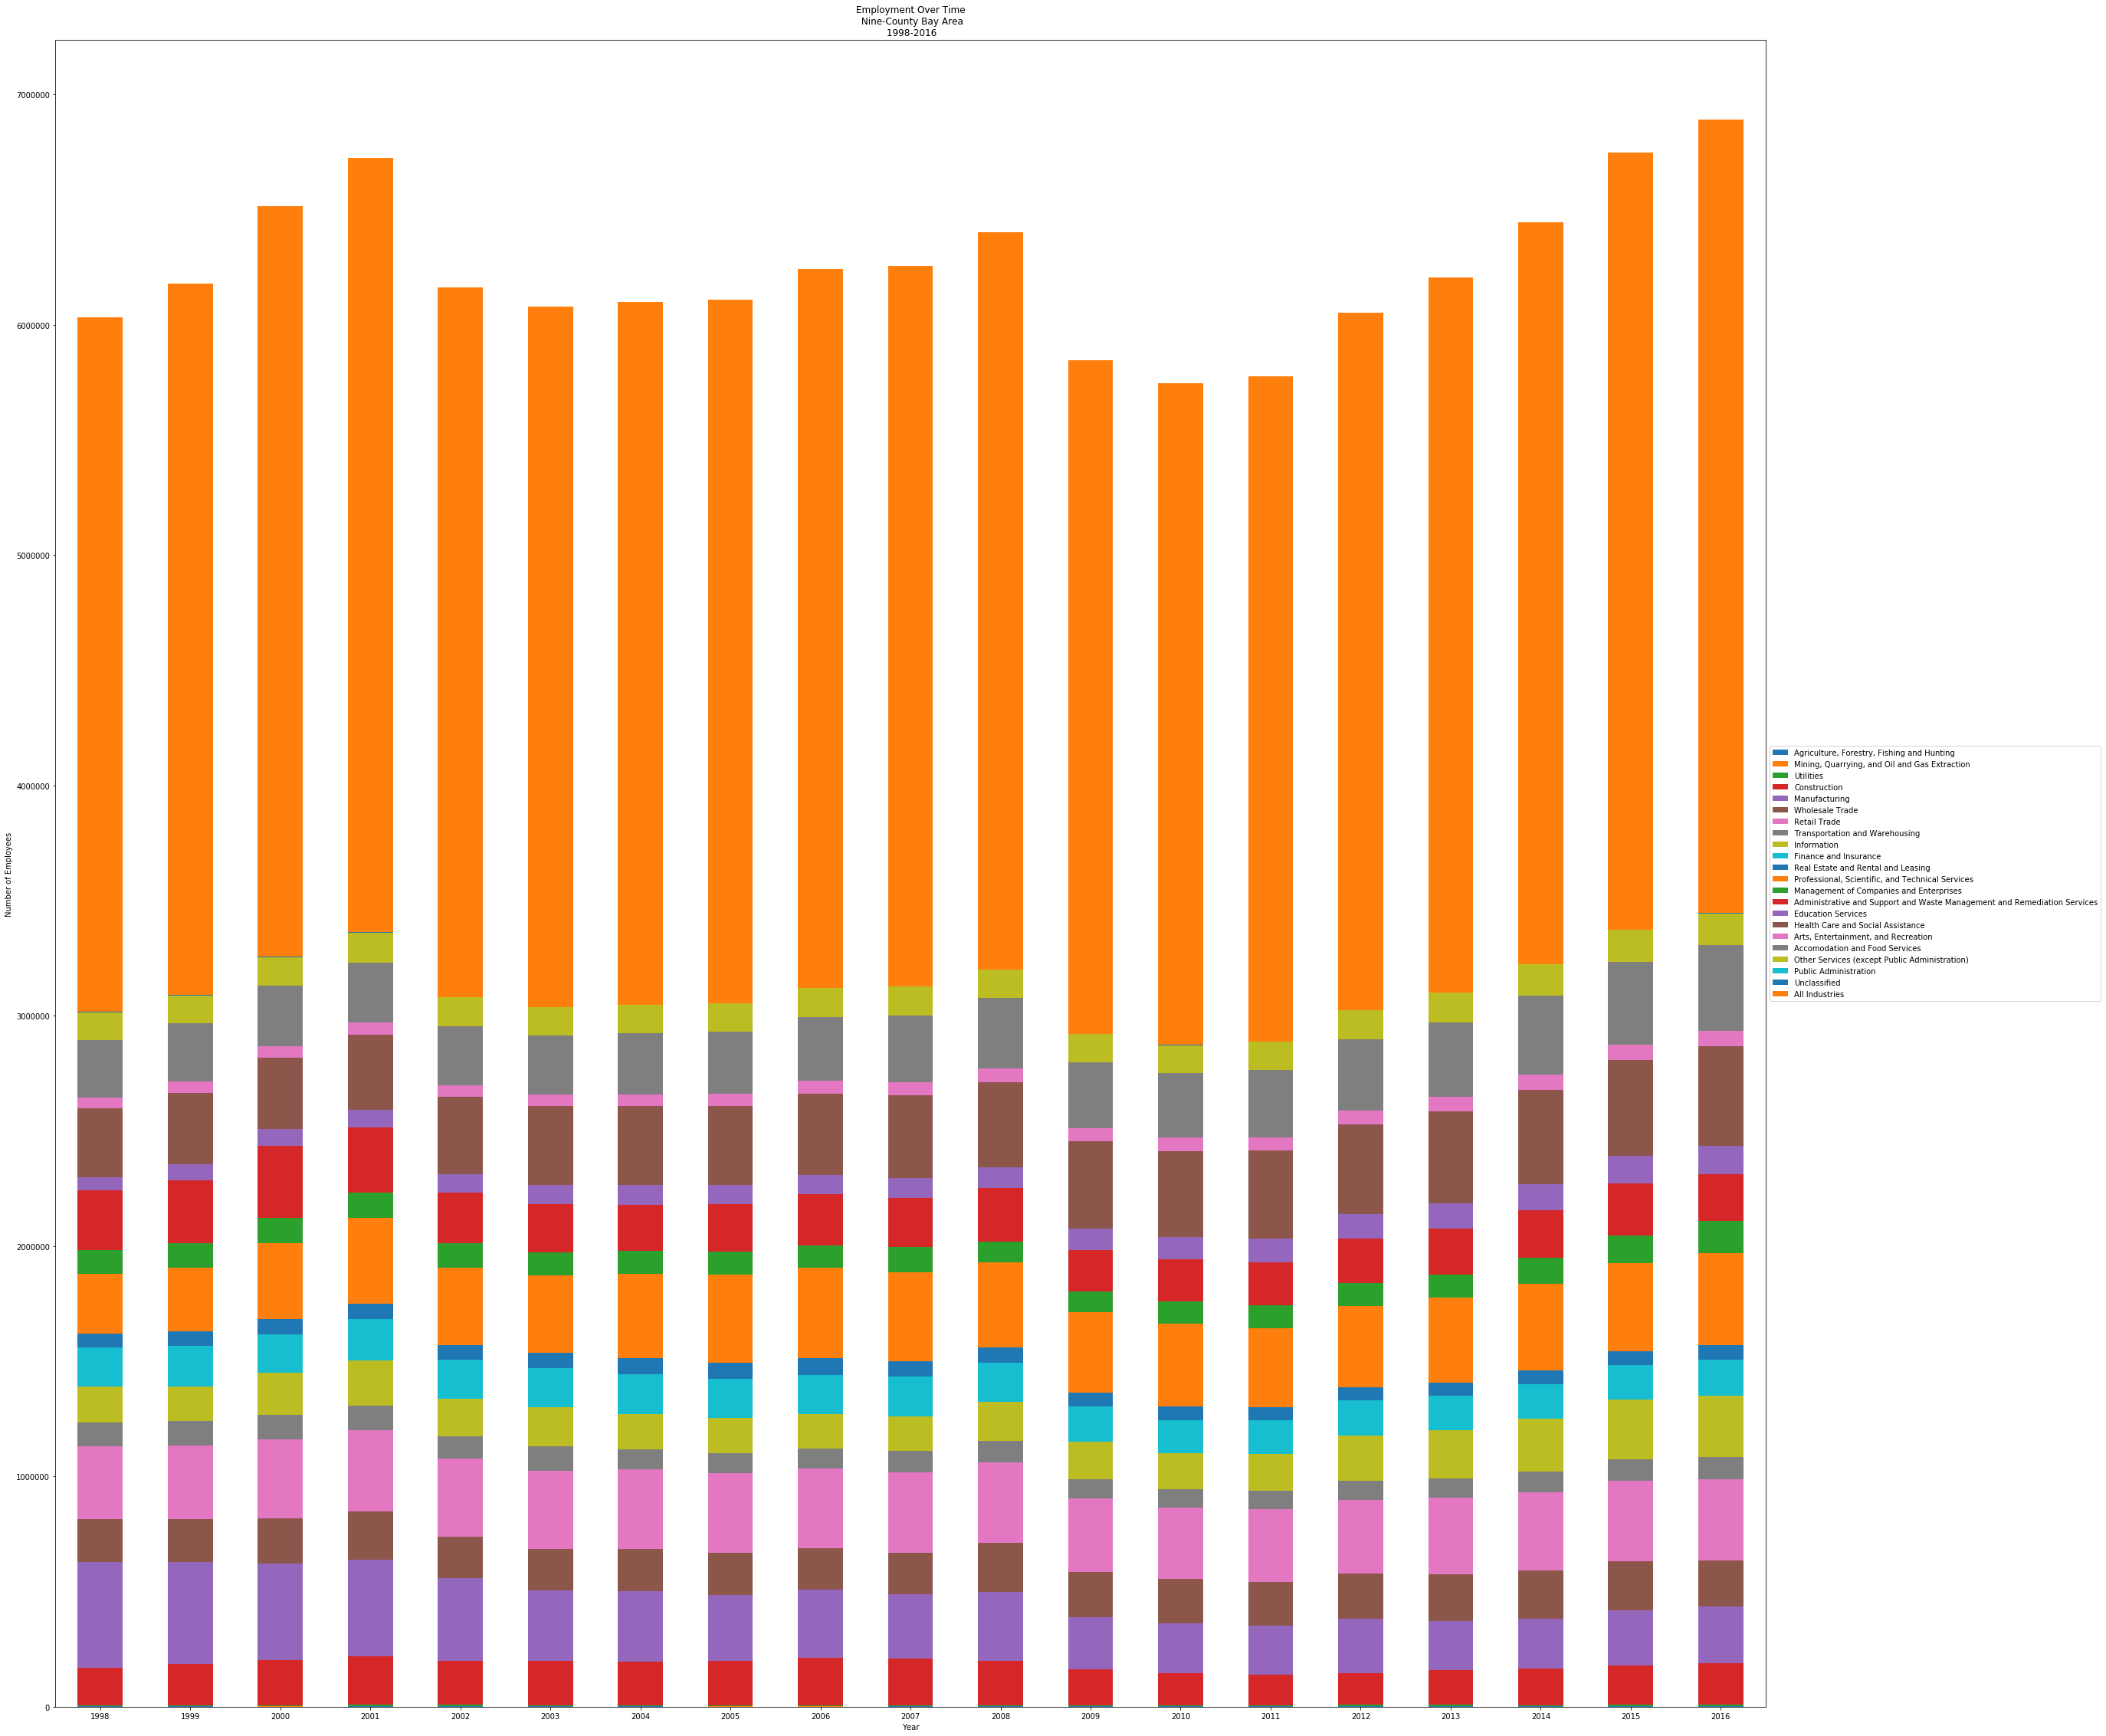

In [258]:
plt.clf()

plt.figure()

empDF.plot(kind="bar", stacked=True, figsize=(40,40))

plt.xticks(np.arange(len(empDF)), series_full_years[2:], rotation=0)
plt.title("Employment Over Time\n Nine-County Bay Area\n 1998-2016")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Number of Employees")

plt.savefig("img/EmploymentTrends.png")

In [289]:
empDF.head()
empDF['All Industries'] = empDF.sum(axis=1)

In [290]:
pct_empDF = empDF.loc[:,"Agriculture, Forestry, Fishing and Hunting":"Unclassified"].div(empDF["All Industries"], axis=0)

pct_empDF.to_csv("output/EmploymentAsPctsOfTotal_BayArea_98_16.csv")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

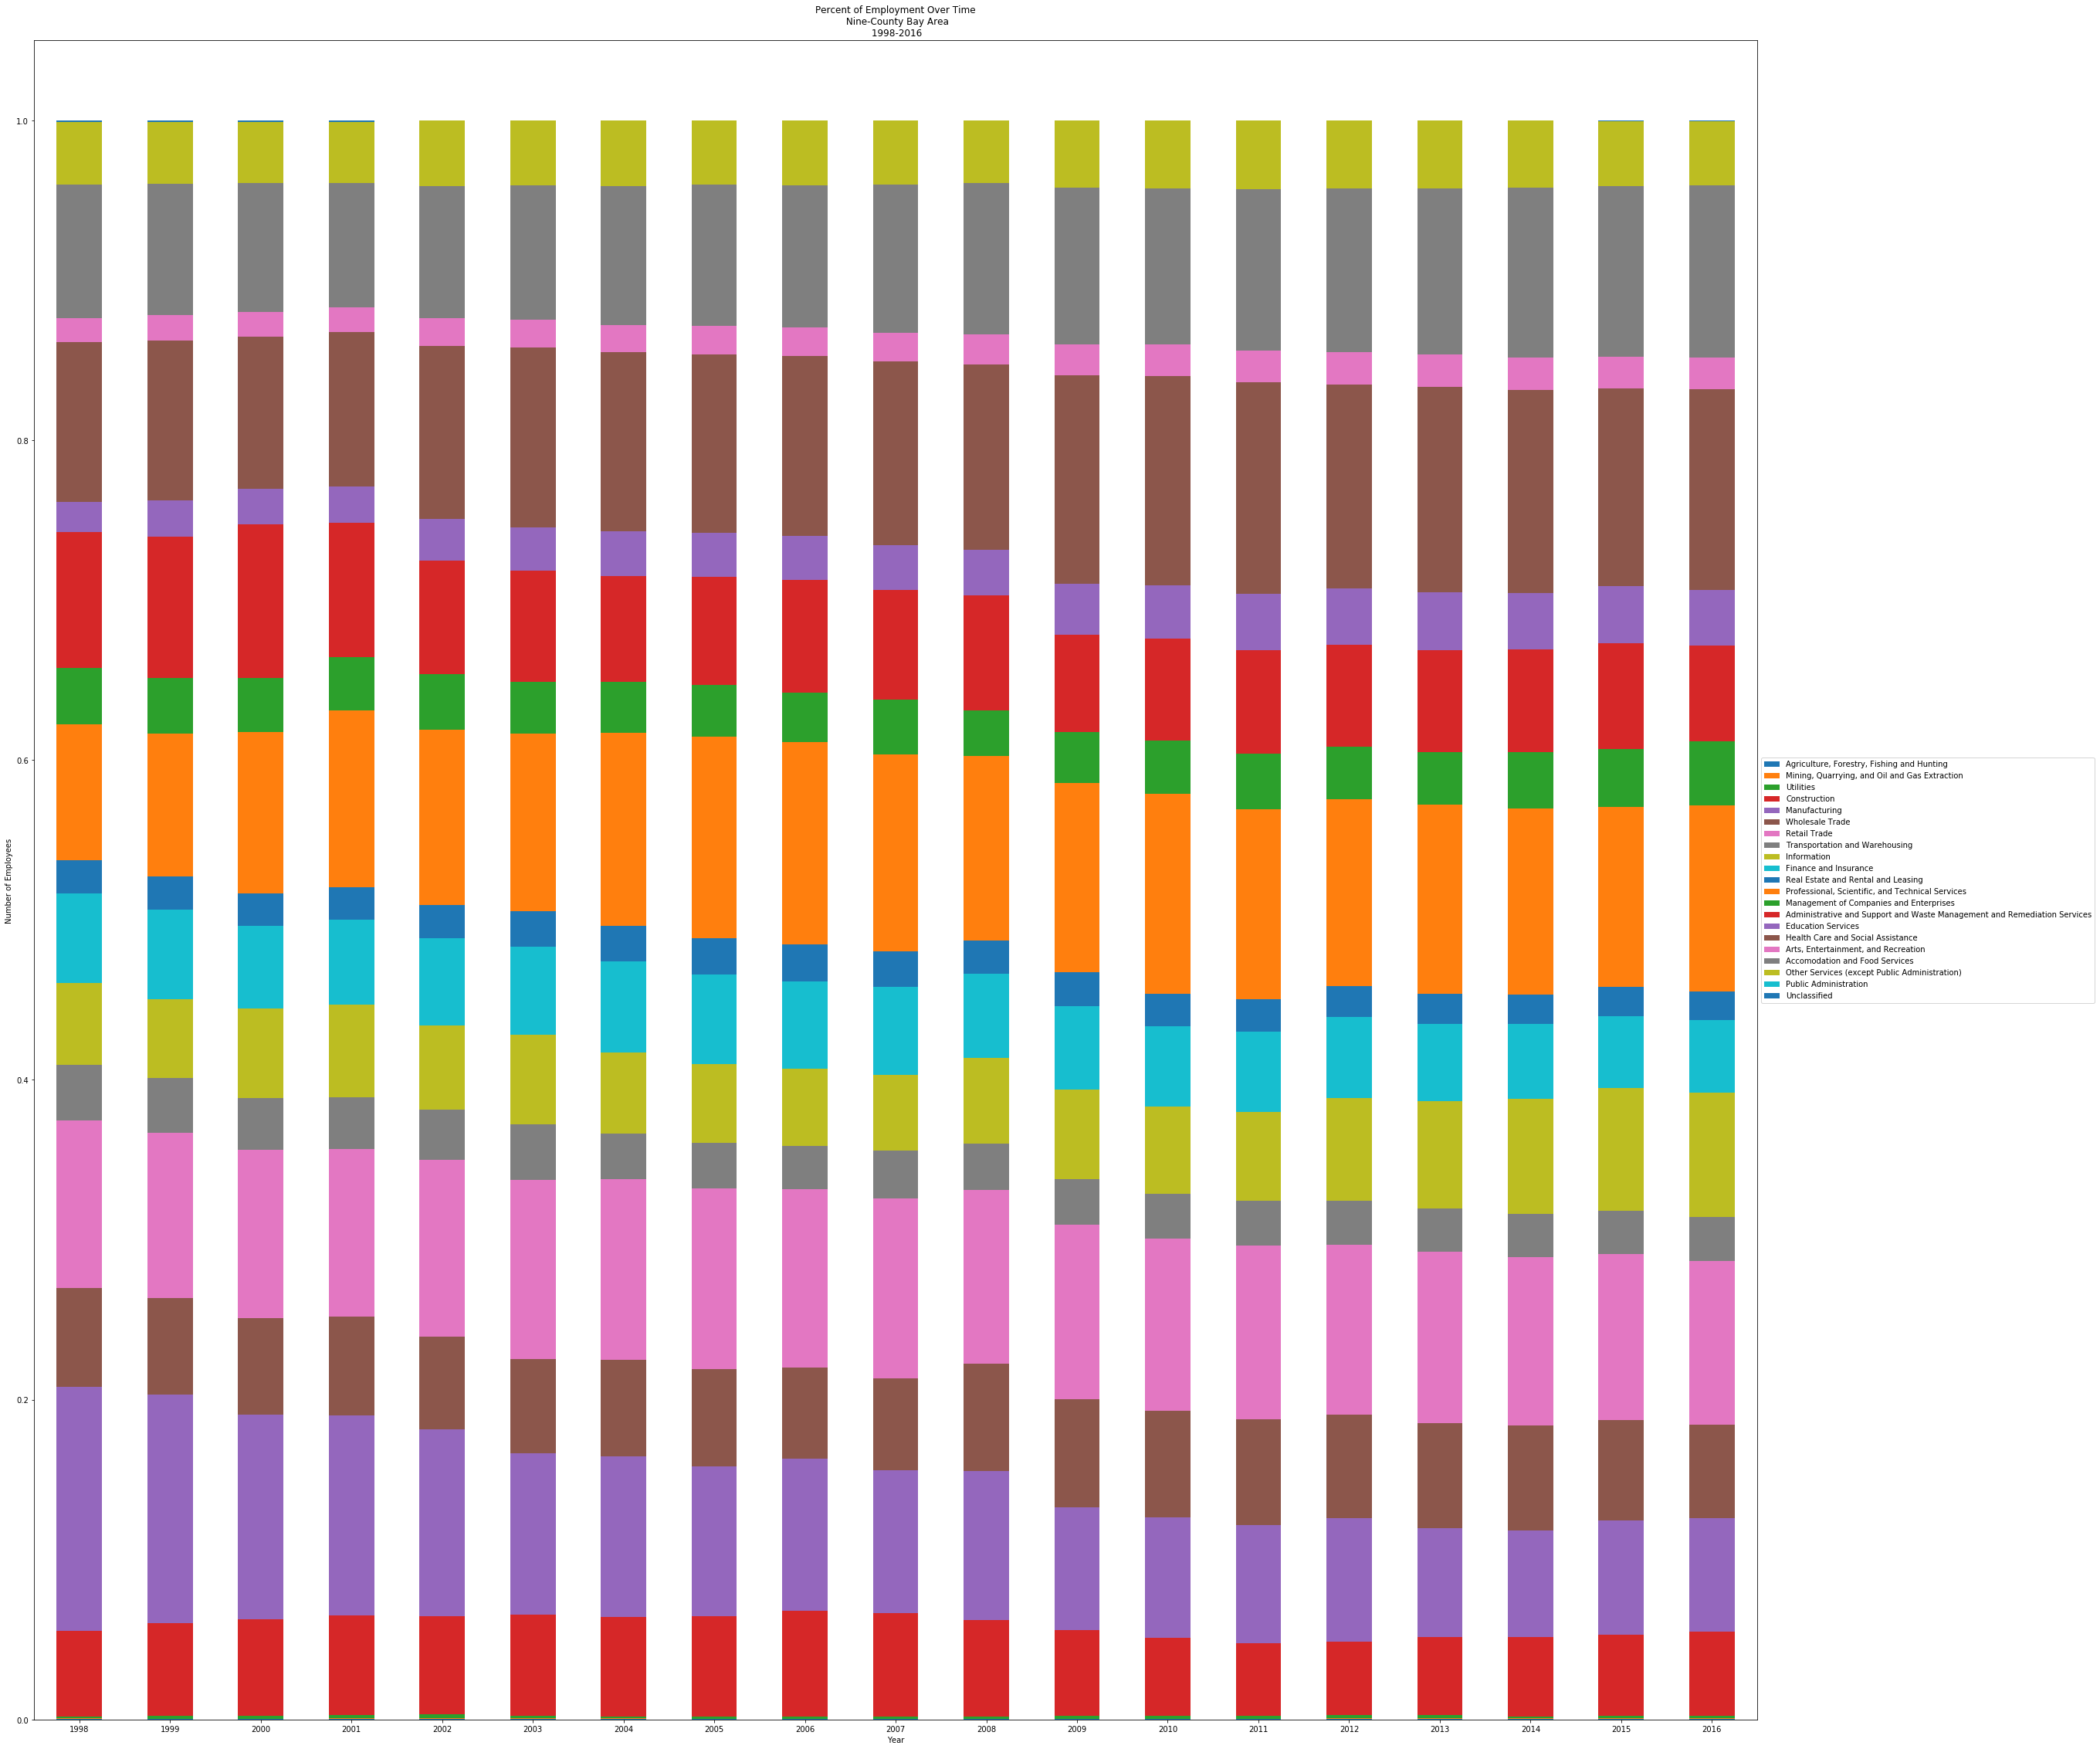

In [269]:
plt.clf()

plt.figure()

pct_empDF.plot(kind="bar", stacked=True, figsize=(40,40))

plt.xticks(np.arange(len(pct_empDF)), series_full_years[2:], rotation=0)
plt.title("Percent of Employment Over Time\n Nine-County Bay Area\n 1998-2016")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Number of Employees")

plt.savefig("img/PctEmploymentTrends.png")

TypeError: title() missing 1 required positional argument: 's'

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

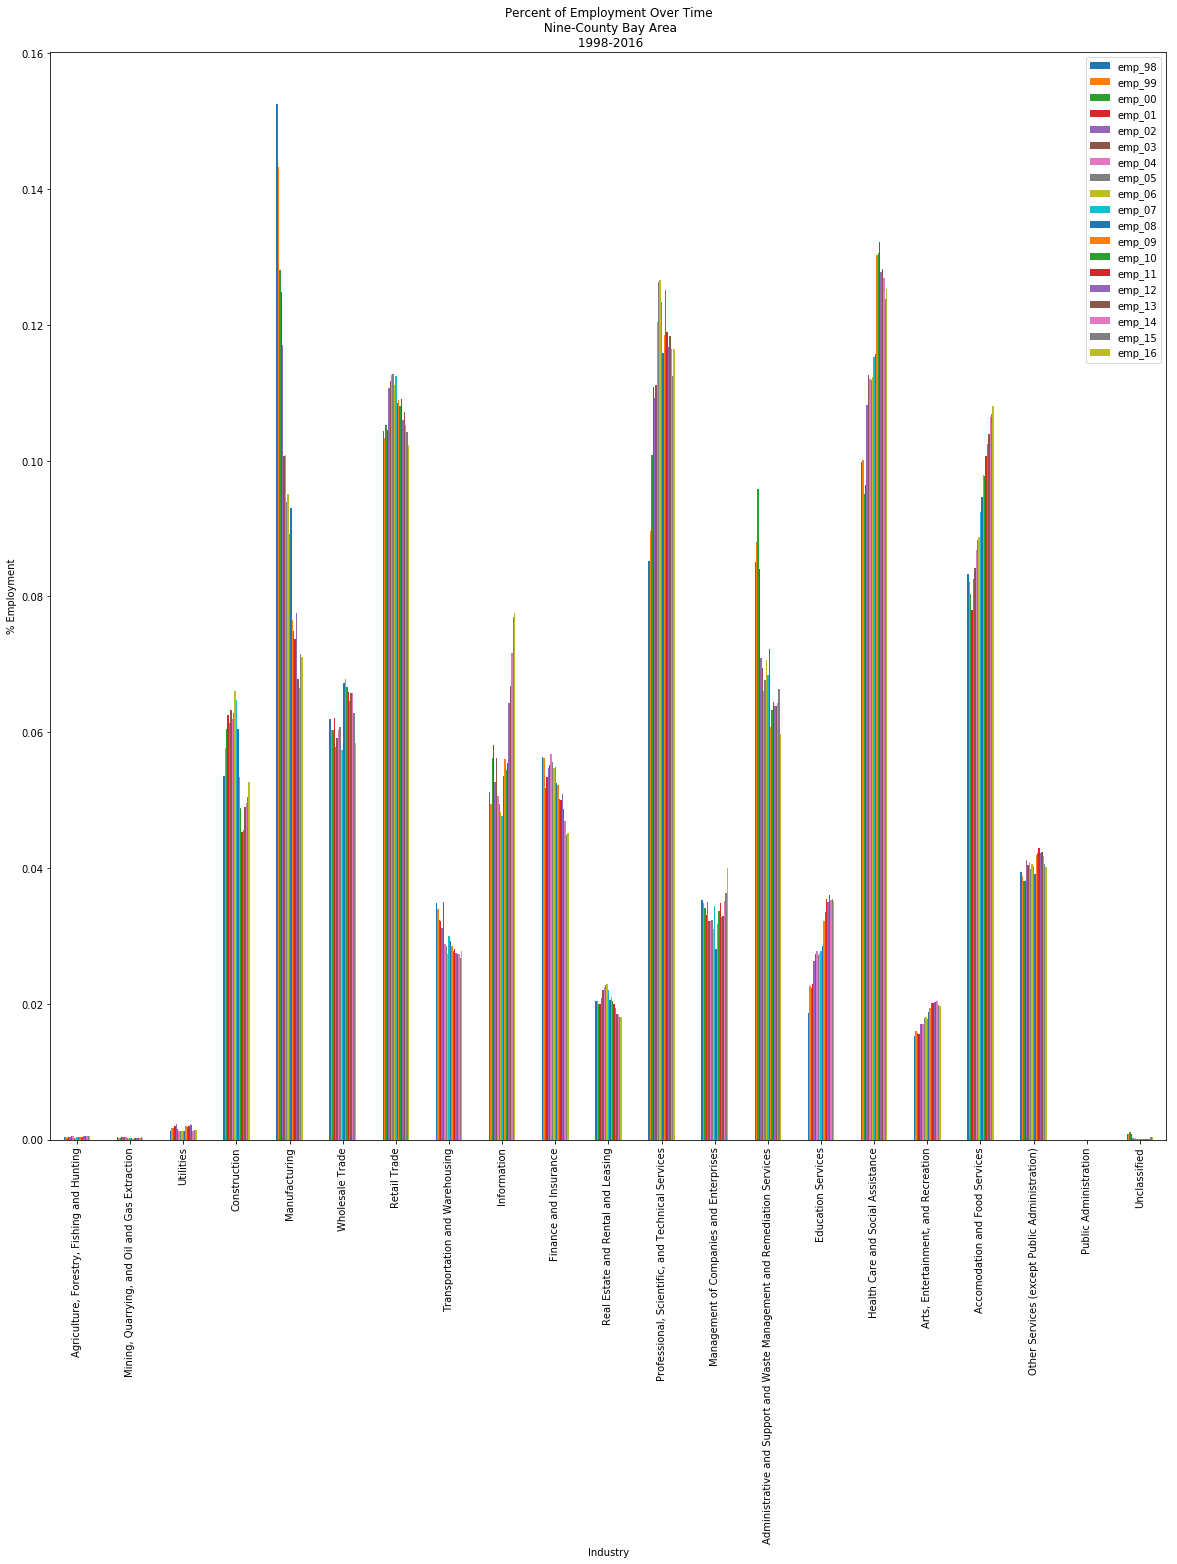

In [270]:
plt.clf()

plt.figure()

pd.DataFrame(pct_empDF.T).plot(kind="bar", figsize=(20,20))

plt.xlabel("Industry")
plt.ylabel("% Employment")
plt.title("Percent of Employment Over Time\n Nine-County Bay Area\n 1998-2016")

plt.savefig("img/PctEmploymentTrends_by_industry.png")

plt.title()

### Establishments

In [272]:
cols2keep_naics = ['fipstate', 'fipscty', 'naics', 'est']
cols2keep_sic = ['fipstate', 'fipscty', 'sic', 'est']

In [273]:
multi_year = pd.DataFrame(columns=cols2keep_naics)

In [274]:
df_holder = []

multi_year = pd.DataFrame(columns=cols2keep_naics)

for year in naics_1997 + naics_2002 + naics_2007 + naics_2012:
    filepath= "data/cbp%sco.txt" % year
    try:
        tempDF = pd.read_csv(filepath, usecols=cols2keep_naics)
    except ValueError:
        try:
            tempDF = pd.read_csv(filepath, usecols=[x.upper() for x in cols2keep_naics])
            tempDF.columns = [x.lower() for x in tempDF.columns]
        except ValueError:
            # older dataset using SIC codes instead of NAICS
            tempDF = pd.read_csv(filepath, usecols=cols2keep_sic)

            # need to write something here to convert SIC to NAICS
            tempDF['sic_number'] = [re.sub('[^0-9]', '', x).ljust(4, "0") for x in tempDF['sic']]

            # using NAICS 97
            tempDF['naics'] = [sic2naics[float(x)] if len(x) > 0 and float(x) in sic2naics else x for x in tempDF['sic_number']]
        
    # restrict to just Bay Area
    tempDF = tempDF[(tempDF['fipstate'] == 6) & (tempDF['fipscty'].isin(nine_counties))]
    
    if len(multi_year) == 0:
        multi_year = tempDF
    else:
        suffix_l = "_" + str((int(year)-1)).zfill(2)
        suffix_r = "_" + year
        multi_year = pd.merge(left=multi_year, right=tempDF, on=['fipstate', 'fipscty', 'naics'], how='outer', suffixes=[suffix_l, suffix_r])
    
    #tempDF['year'] = year
    
    #df_holder.append(tempDF)
    
    print(year, tempDF.shape)
    #print(tempDF.head(10))

98 (14381, 4)
99 (14497, 4)
00 (14507, 4)
01 (14536, 4)
02 (14503, 4)
03 (14527, 4)
04 (14514, 4)
05 (14418, 4)
06 (14410, 4)
07 (14446, 4)
08 (14228, 4)
09 (14078, 4)
10 (14041, 4)
11 (14014, 4)
12 (13755, 4)
13 (13744, 4)
14 (13779, 4)
15 (13786, 4)
16 (13754, 4)


In [275]:
multi_year_two_digit = multi_year[(multi_year.naics.str[2:] == "----") & (multi_year.naics.str[:2] != "--")].sort_values(["fipscty", "naics"]).reset_index()
multi_year_two_digit.head()

,index,fipstate,fipscty,naics,est_98,est_99,est_00,est_01,est_02,est_03,est_04,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14,est_15,est
0,1,6,1,11----,29.0,31.0,30.0,32.0,35.0,33.0,30.0,23.0,24.0,19.0,19.0,16.0,15.0,14.0,19.0,19.0,18.0,16.0,15.0
1,18,6,1,21----,16.0,19.0,18.0,18.0,14.0,10.0,11.0,13.0,12.0,9.0,9.0,5.0,5.0,8.0,7.0,11.0,13.0,10.0,9.0
2,41,6,1,22----,11.0,16.0,17.0,16.0,19.0,15.0,14.0,9.0,10.0,11.0,13.0,14.0,14.0,19.0,21.0,21.0,19.0,17.0,21.0
3,55,6,1,23----,2658.0,2790.0,2845.0,2777.0,2784.0,2847.0,2846.0,2842.0,2962.0,3004.0,2924.0,2760.0,2625.0,2602.0,2666.0,2667.0,2670.0,2790.0,2819.0
4,129,6,1,31----,2449.0,2478.0,2430.0,2381.0,2315.0,2258.0,2219.0,2136.0,2106.0,2069.0,2030.0,1884.0,1835.0,1826.0,1856.0,1800.0,1800.0,1838.0,1819.0


In [276]:
sum_list = []

for naics in industries.keys():
    tempDF = pd.DataFrame(multi_year_two_digit[multi_year_two_digit['naics'] == naics][list(multi_year_two_digit.columns)[4:]].sum(axis=0)).T
    tempDF['naics'] = naics
    
    sum_list.append(tempDF)
    
    #print(multi_year_two_digit[multi_year_two_digit['naics'] == naics][list(multi_year_two_digit.columns)[4:]].sum(axis=1))
    
    
    
establishment_trends = pd.concat(sum_list, ignore_index=True)
establishment_trends.rename(columns={"est":"est_16"}, inplace=True)

establishment_trends = establishment_trends[[list(establishment_trends.columns)[-1]] + list(establishment_trends.columns)[:-1]]

In [293]:
estDF = pd.DataFrame(establishment_trends.T)
estDF.columns = [industries[x] for x in list(estDF.iloc[0])]
estDF = estDF[1:]

estDF.to_csv("output/Establishments_BayArea_98_16.csv")

estDF.head()

,"Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing,Information,Finance and Insurance,Real Estate and Rental and Leasing,"Professional, Scientific, and Technical Services",Management of Companies and Enterprises,Administrative and Support and Waste Management and Remediation Services,Education Services,Health Care and Social Assistance,"Arts, Entertainment, and Recreation",Accomodation and Food Services,Other Services (except Public Administration),Public Administration,Unclassified
est_98,203,94,95,15479,10541,12949,23147,3539,4674,11312,8952,26165,1318,10357,2407,18721,2307,15087,15700,0,1988
est_99,215,100,111,15818,10396,12732,23188,3524,4907,10719,9034,27246,1343,10243,2424,18454,2325,15049,15564,0,3292
est_00,200,101,107,16294,10215,12480,23293,3630,5342,10695,9130,28500,1432,10300,2479,18575,2339,15107,15786,0,3364
est_01,259,102,126,16079,10023,12185,23360,3531,5296,10760,9459,28383,1535,10421,2540,18763,2377,15454,15638,0,2408
est_02,277,82,155,16185,9512,11599,23233,3529,4940,11380,9761,28525,1400,9449,2579,19395,2391,15895,15901,0,916


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

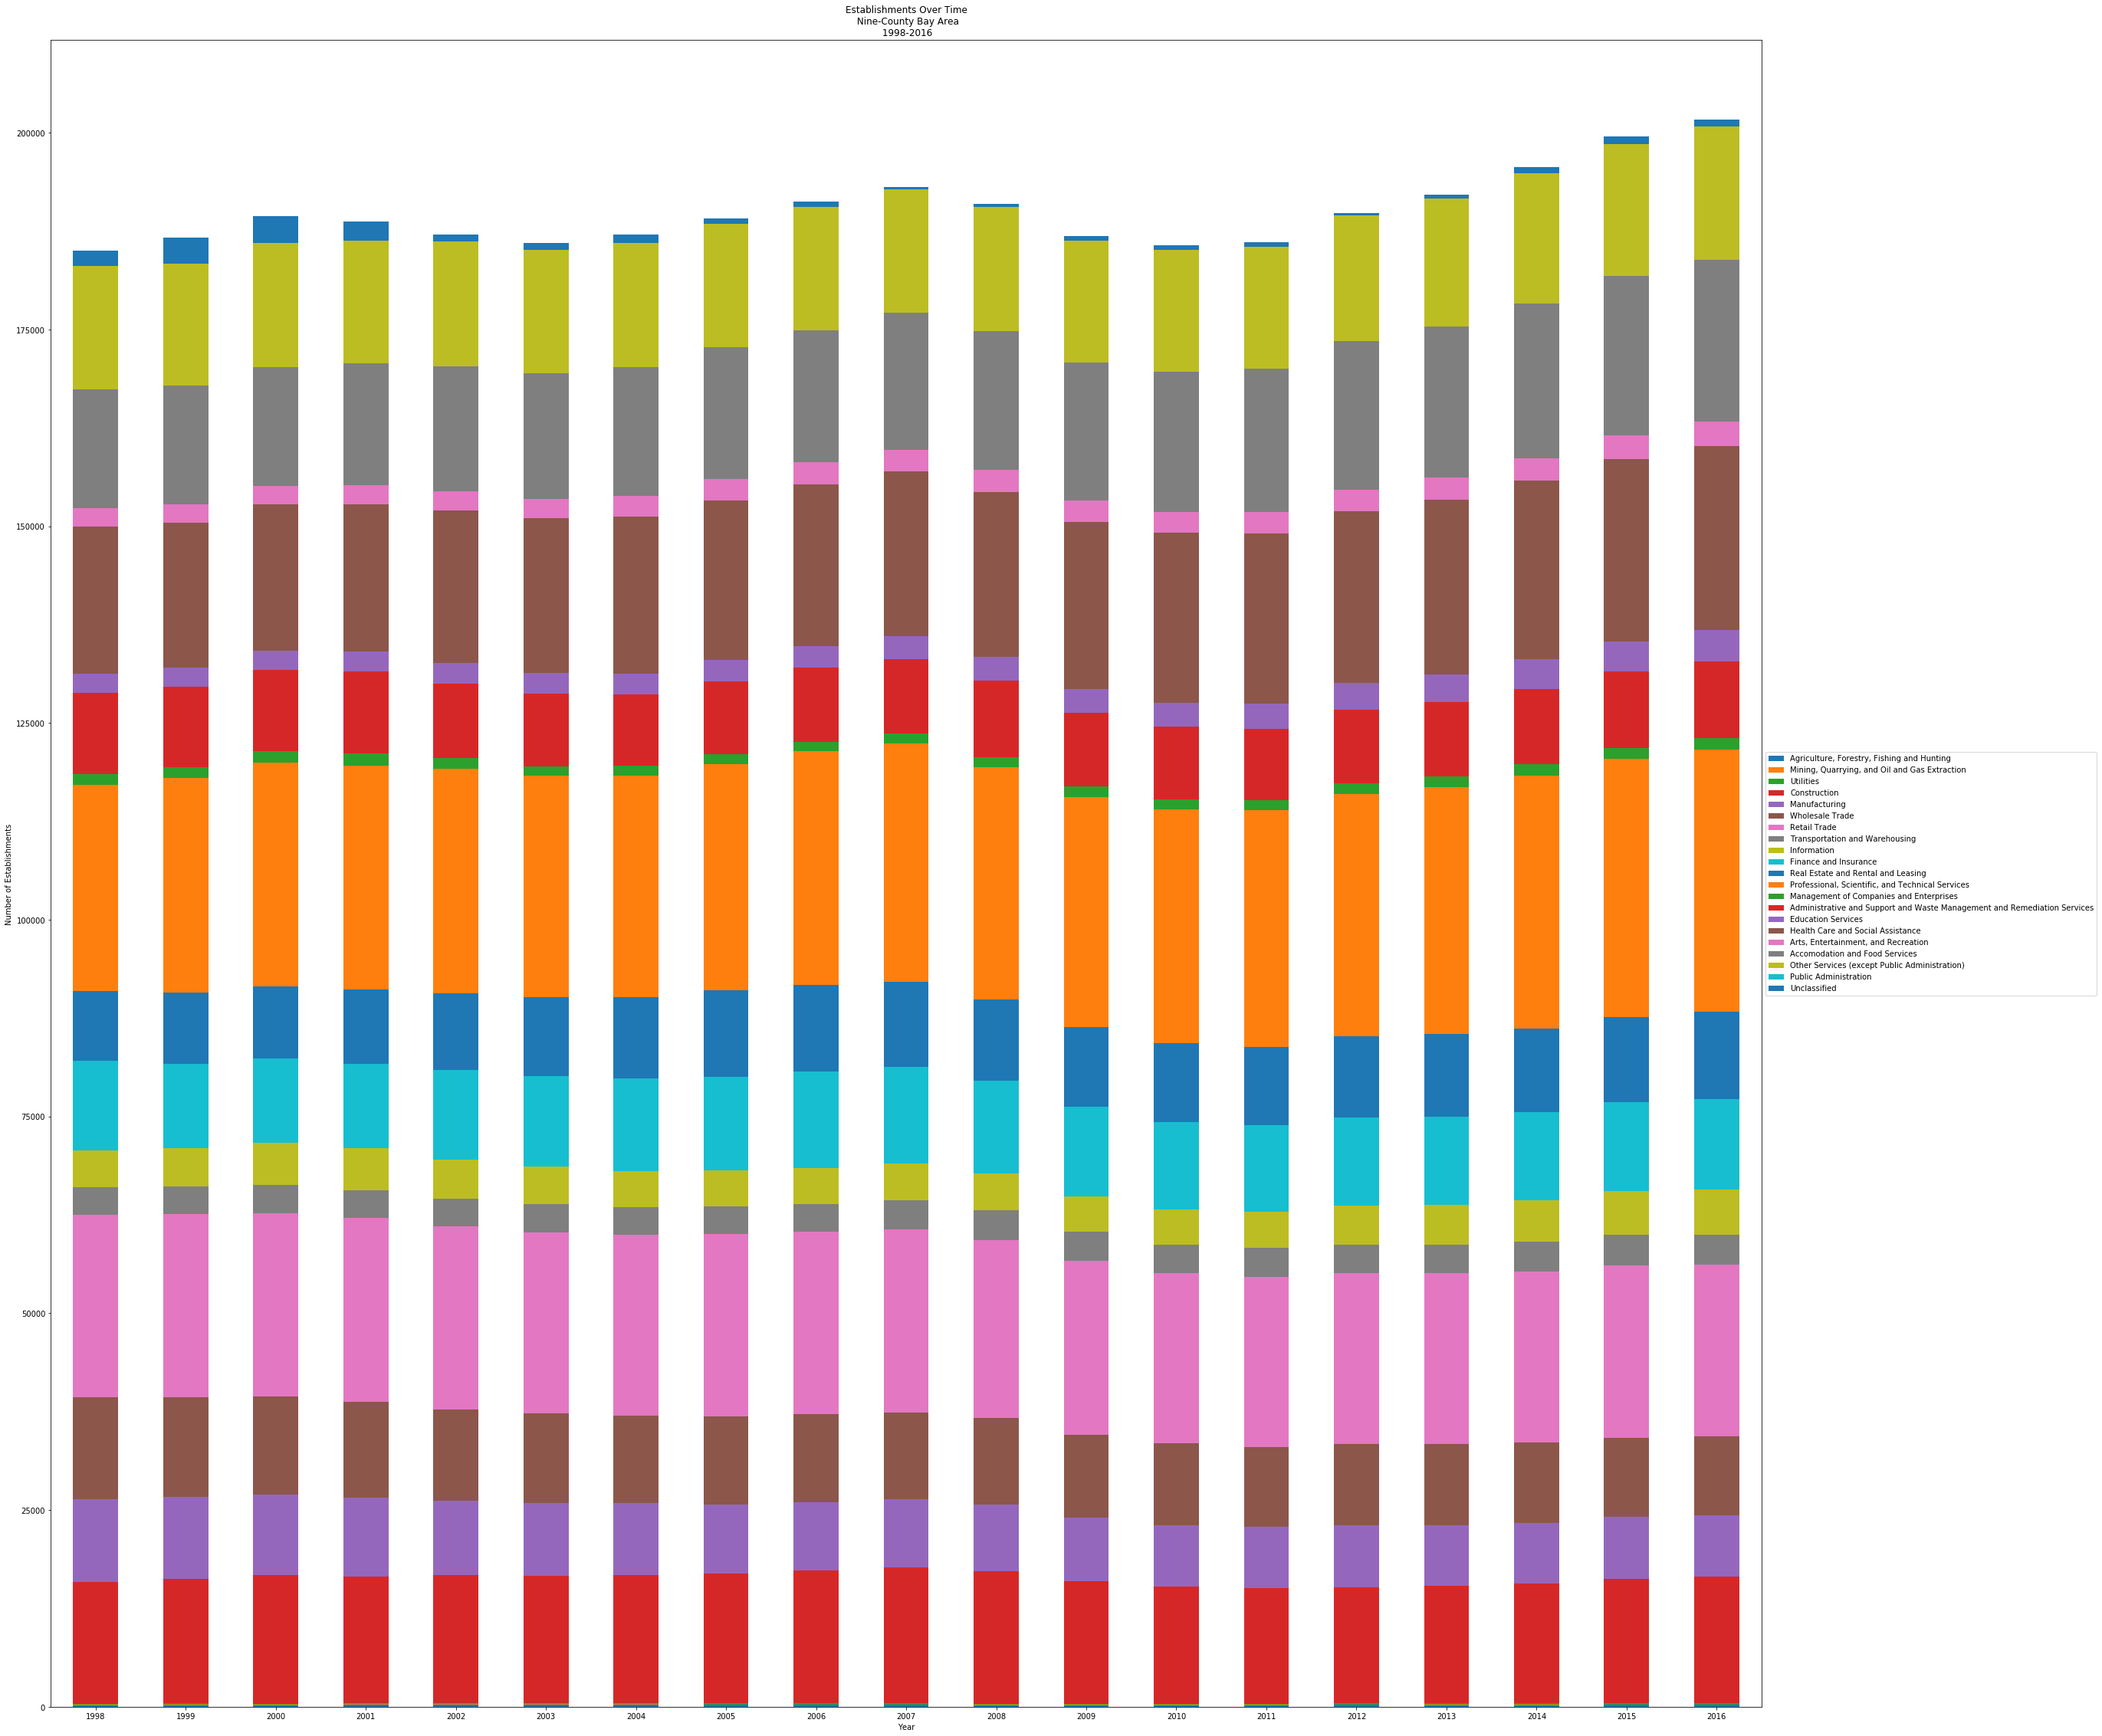

In [279]:
plt.clf()

plt.figure()

estDF.plot(kind="bar", stacked=True, figsize=(40,40))

plt.xticks(np.arange(len(estDF)), series_full_years[2:], rotation=0)
plt.title("Establishments Over Time\n Nine-County Bay Area\n 1998-2016")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Number of Establishments")

plt.savefig("img/EstablishmentTrends.png")

In [280]:
estDF.head()
estDF['All Industries'] = estDF.sum(axis=1)

In [291]:
pct_estDF = estDF.loc[:,"Agriculture, Forestry, Fishing and Hunting":"Unclassified"].div(estDF["All Industries"], axis=0)

pct_estDF.to_csv("output/EstablishmentsAsPctsOfTotal_BayArea_98_16.csv")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

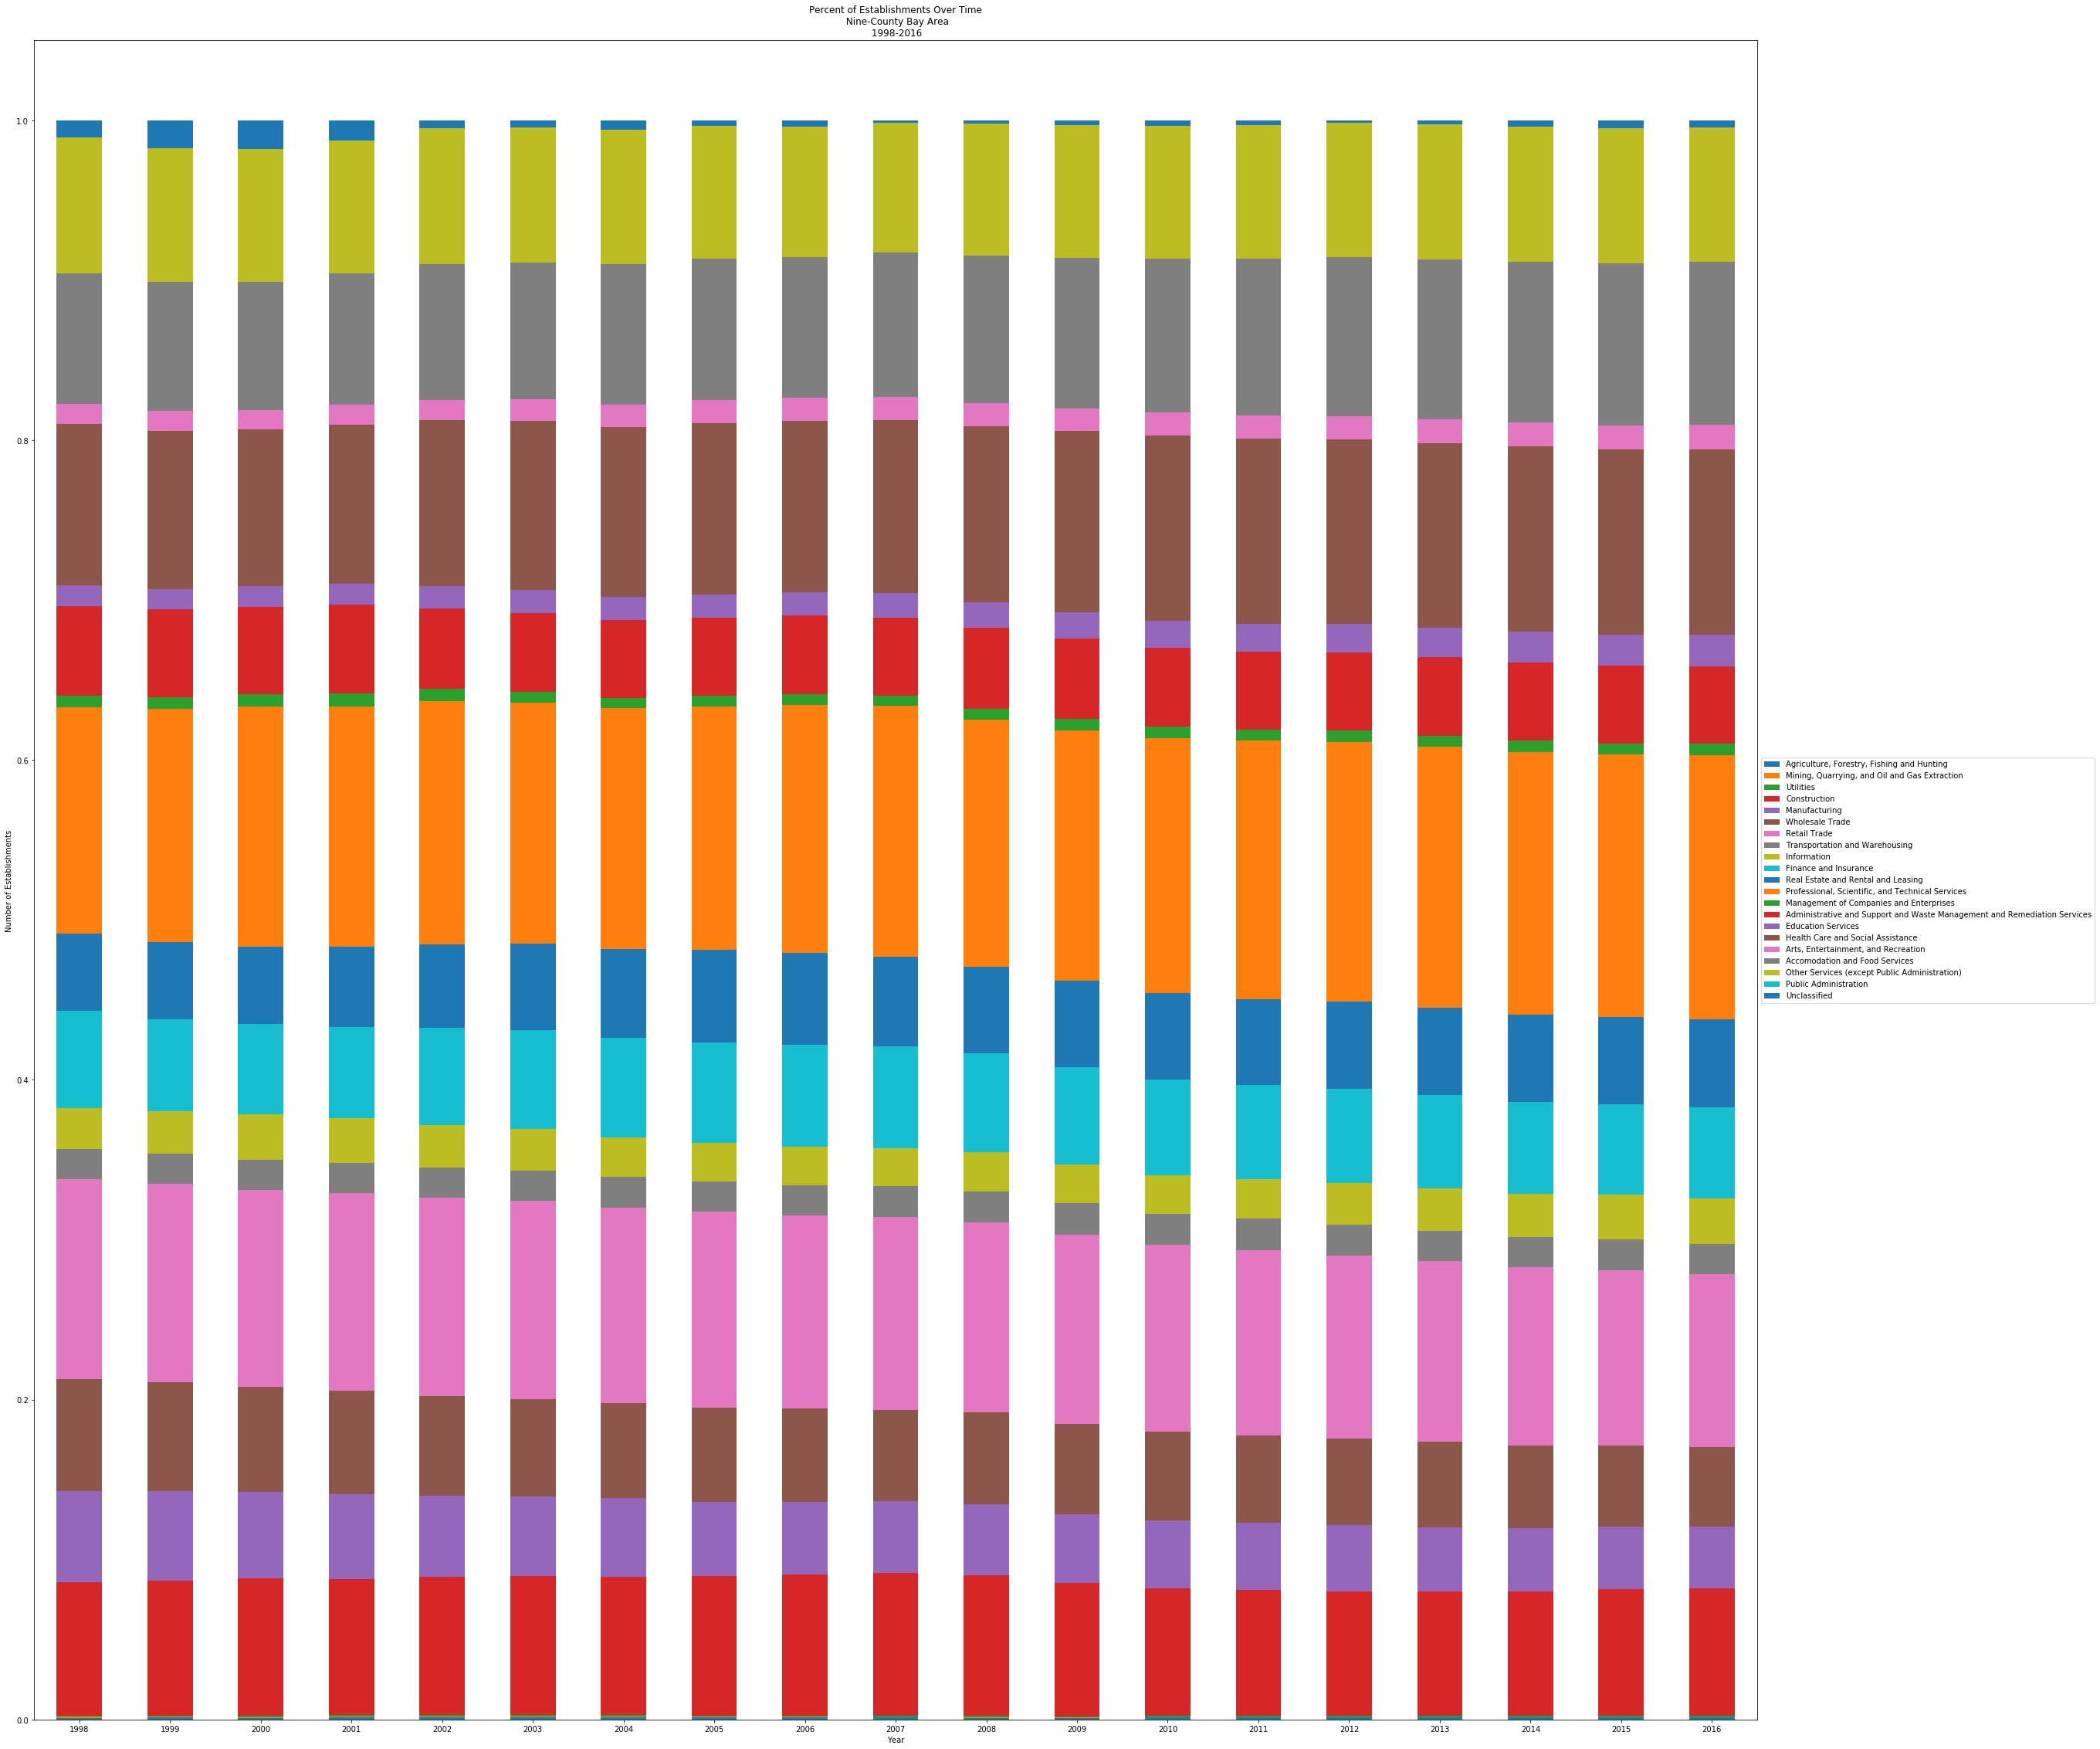

In [282]:
plt.clf()

plt.figure()

pct_estDF.plot(kind="bar", stacked=True, figsize=(40,40))

plt.xticks(np.arange(len(pct_estDF)), series_full_years[2:], rotation=0)
plt.title("Percent of Establishments Over Time\n Nine-County Bay Area\n 1998-2016")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Number of Establishments")

plt.savefig("img/PctEstablishmentTrends.png")

TypeError: title() missing 1 required positional argument: 's'

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

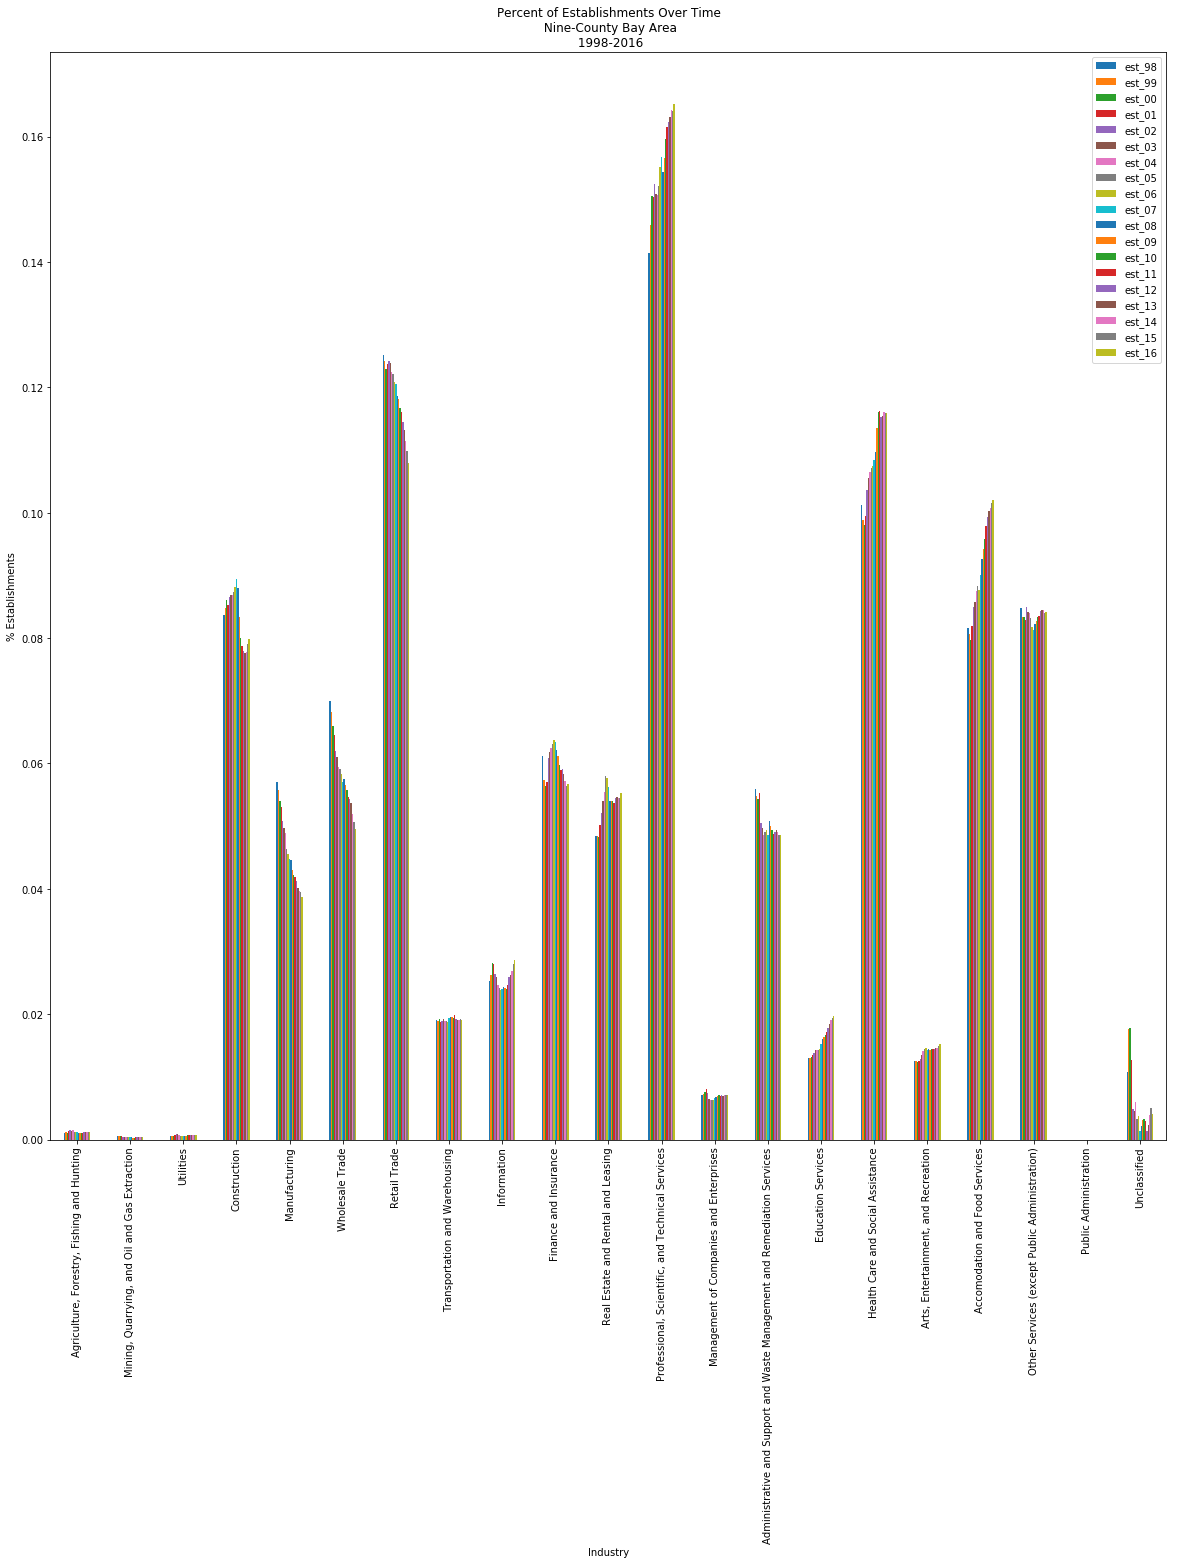

In [283]:
plt.clf()

plt.figure()

pd.DataFrame(pct_estDF.T).plot(kind="bar", figsize=(20,20))

plt.xlabel("Industry")
plt.ylabel("% Establishments")
plt.title("Percent of Establishments Over Time\n Nine-County Bay Area\n 1998-2016")

plt.savefig("img/PctEstablishmentTrends_by_industry.png")

plt.title()